# PRÁCTICA MACHINE LEARNING CON PYTHON



Máster Big Data y Data Science (UCM) - 
Profesor Módulo: José Ángel Carballo, 
**Elaborado por Maria Luznedy Gomez**

## INTRODUCCION

El objetivo de la práctica consiste en calcular el **churn** de clientes en una empresa de telecomunicaciones. Se dispone de varios datasets (Cosechas DIC 2019 y ENE 2020) con datos que aportan información de los clientes, productos, consumos y financiación. 

No obstante, la variable target no se tiene, por lo que habrá que construirla a través del "id" (identificador de cliente) común en todos los datasets.

## DESCRIPCIÓN DE VARIABLES:
**CLIENTES**
- **edad**: edad de los clientes.
- **facturacion:** dinero que pagan los clientes al mes.
- **antiguedad:** fecha de alta del cliente.
- **provincia:** lugar de procedencia del cliente.
- **num_lineas:** número de líneas móviles contratadas.
- **num_dt:** número de líneas en impago.
- **incidencia:** es SI,si el cliente ha tenido alguna incidencia/reclamación.

**PRODUCTOS**
- **conexión:** tipo de conexión de internet del cliente.
- **vel_conexion:** velocidad de conexión de internet.
- **TV:** tipo de paquete de tv contratado por el cliente.

**CONSUMOS**
- **num_llamad_ent:** número de llamadas entrantes de todas sus líneas.
- **num_llamad_sal:** número de llamadas salientes de todas sus líneas.
- **mb_datos:** mb de los datos consumidos en todas sus líneas.
- **seg_llamad_ent:** segundos consumidos en llamadas entrantes.
- **seg_llamad_sal:** segundos consumidos en llamadas salientes.

**FINANCIACIÓN**
- **financiación:** es SI, si el cliente tiene financiado algún terminal.
- **imp_financ:** el dinero mensual que paga por los terminales financiados.
- **descuentos:** es SI, si el cliente tiene activo algún descuento (campaña).


## TABLA DE CONTENIDO:

    0. Cargar las librerias necesarias para la practica
    1. Cargar datos de enero y diciembre.
    2. Creacion la variable Target
    3. Prepocesado y limplieza de datos
    4. Correr un modelo inicial y evaluar sus resultados
    5. Mejorar el modelo:
        1. Transformar las variables para mejorar su correlación con la objetivo.
        2. Añadir variables que puedan haber sido quitadas en el pre-proceso.
        4. Seleccionar las variables mas significativas.
    6. Correr modelos y evaluar resultados 
    7. Conclusiones
    8. Prediccion de Enero


## 0) Cargue de Paquetes Phyton

Se cargan las librerias necesarias para el analisis.

In [2]:
import pandas as pd                                  # OK
import matplotlib.pyplot as plt                      # OK
import seaborn as sns                                # OK
import numpy as np                                   # OK
from sklearn.model_selection import train_test_split #OK
from sklearn import preprocessing                    # ok
from datetime import datetime                        # OK
from sklearn.metrics import precision_score          # ok
from sklearn.metrics import accuracy_score           # OK
from sklearn.metrics import auc                      # OK 
from sklearn.metrics import f1_score                 # OK
from sklearn.metrics import recall_score             # OK
from sklearn.metrics import roc_curve                # OK
from sklearn.ensemble import RandomForestClassifier  # OK
from sklearn.linear_model import LogisticRegression  # OK
from sklearn.tree import DecisionTreeClassifier      # OK
from sklearn.metrics import confusion_matrix         # OK
from sklearn.preprocessing import LabelEncoder       # OK
from sklearn.metrics import classification_report    # OK
from sklearn.feature_selection import VarianceThreshold # eliminacion por variaza, las variables mas importantes del modelo o le dices cuales son las m[as importantes, le dices las k variables]

## 1) Cargue de Datos


Se carga toda la informacion tanto de enero como de diciembre, teniendo en cuenta el separador del archivo CSV

In [3]:
consumo_ene = pd.read_csv('./enero/consumos_enero.csv', sep = '|')
cliente_ene = pd.read_csv('./enero/clientes_enero.csv', sep = '|')
financia_ene = pd.read_csv('./enero/financiacion_enero.csv', sep = '|')
producto_ene = pd.read_csv('./enero/productos_enero.csv', sep = '|')
consumo_dic = pd.read_csv('./diciembre/consumos_diciembre.csv', sep = '|')
cliente_dic = pd.read_csv('./diciembre/clientes_diciembre.csv', sep = '|')
financia_dic = pd.read_csv('./diciembre/financiacion_diciembre.csv', sep = '|')
producto_dic = pd.read_csv('./diciembre/productos_diciembre.csv', sep = '|')

#### Revisamos la informacion de Diciembre y Enero, al igual que los tamaños de los archivos

Aqui se realiza una breve validacion de la informacion que se cargo en cada unos de los archivos para Enero

In [4]:
print('Tamaño de tabla de consumos Enero:',consumo_ene.shape[0])
print('Tamaño de tabla de clientes Enero:',cliente_ene.shape[0])
print('Tamaño de tabla de financiación Enero:',financia_ene.shape[0])
print('Tamaño de tabla de productos Enero:',producto_ene.shape[0])

Tamaño de tabla de consumos Enero: 92711
Tamaño de tabla de clientes Enero: 92711
Tamaño de tabla de financiación Enero: 25332
Tamaño de tabla de productos Enero: 92711


Aqui se realiza una breve validacion de la informacion que se cargo en cada unos de los archivos para Diciembre

In [5]:
print('Tamaño de tabla de consumos Diciembre:',consumo_dic.shape[0])
print('Tamaño de tabla de clientes Diciembrero:',cliente_dic.shape[0])
print('Tamaño de tabla de financiación Diciembre:',financia_dic.shape[0])
print('Tamaño de tabla de productos Diciembre:',producto_dic.shape[0])

Tamaño de tabla de consumos Diciembre: 95467
Tamaño de tabla de clientes Diciembrero: 95467
Tamaño de tabla de financiación Diciembre: 24198
Tamaño de tabla de productos Diciembre: 95467


### 1.1) Consolidación de Información:

Se consolidan las tablas para Diciembre y Enero

In [6]:
consolidada_ene=cliente_ene.merge(consumo_ene,how='left')
consolidada_ene=consolidada_ene.merge(financia_ene,how='left' )
consolidada_ene=consolidada_ene.merge(producto_ene,how='left')

Se consolida igualmente diciembre en unico archivo

In [7]:
consolidada_dic=cliente_dic.merge(consumo_dic,how='left')
consolidada_dic=consolidada_dic.merge(financia_dic,how='left')
consolidada_dic=consolidada_dic.merge(producto_dic,how='left')

#### Se resetean los indices, para evitar duplicados

In [8]:
consolidada_dic.reset_index(drop= True , inplace=True)
consolidada_ene.reset_index(drop= True , inplace=True)

In [9]:
print('Diciembre: ',len(consolidada_dic['id'].unique()))
print('Enero: ',len(consolidada_ene['id'].unique()))

Diciembre:  95467
Enero:  92711


En las tablas consolidadas se encuentra toda la informacion y no se han perdido datos, para diciembre hay *95467* y para enero *92711*.

## 2) Creacion la Variable Target

Se crea la variable Target a partir de la informacion de enero, si no esxiste en Enero es porque el cliente abandono la compañía y se le asigna el vlaor de uno, mientras que si continua se le asigna el valor de 0.

Antes se comprobará que no hay duplicados y se tendrá especial cuidado en el sentido que se hace la comparación para no cometer el error de hacerlo al revés, ya que la target no tendría nada que ver con el objetivo de la práctica

In [10]:
consolidada_dic['retiro'] = consolidada_dic['id'].isin(consolidada_ene['id'])
consolidada_dic['retiro']= consolidada_dic['retiro'].apply(lambda x: 'No' if x == True else 'Si')

In [11]:
consolidada_ene['retiro'] = np.nan

In [12]:
consolidada_dic.isnull().sum() 

id                    0
edad                  0
facturacion           0
antiguedad            0
provincia             0
num_lineas            0
num_dt            90738
incidencia        91893
num_llamad_ent        0
num_llamad_sal        0
mb_datos              0
seg_llamad_ent        0
seg_llamad_sal        0
financiacion      89095
imp_financ        89095
descuentos        76313
conexion              0
vel_conexion          3
TV                    0
retiro                0
dtype: int64

## 3) Pre Procesado y Limpieza de los Datos

#### Se Trabaja con las variables fecha para crear la antiguedad

Tenemos una variable con las fechas de alta de los clientes, esta variable es leída como cadena de caracteres. Sin embargo, el objetivo es pasarla a numérica. Para ello, tenemos que hacer un paso intermedio convirtiéndola a formato fecha previamente.

La transformación a formato fecha la hacemos con la función datetime.strptime(). Es importante recalcar que, para que la función haga la conversión, hay que correctamente especificar el formato de fecha que se está usando. En este caso: '%m/%d/%Y %I:%M %p'.

Una vez en formato fecha, le paso la función 'datetime.timestamp()' para realizar la conversión a numérico.


In [13]:
consolidada_dic['antiguedad']= pd.to_datetime(consolidada_dic['antiguedad'], format= '%Y-%m-%d %H:%M:%S')
consolidada_ene['antiguedad']= pd.to_datetime(consolidada_ene['antiguedad'], format= '%m/%d/%Y %I:%M %p')

In [14]:
diciembre_fin_mes = pd.to_datetime('2019-12-31 00:00:00', format= '%Y-%m-%d %H:%M:%S')
enero_fin_mes = pd.to_datetime('01/31/2020 12:00 AM', format= '%m/%d/%Y %I:%M %p')


In [15]:
consolidada_dic['antiguedad'] = diciembre_fin_mes - consolidada_dic['antiguedad']
consolidada_ene['antiguedad'] = enero_fin_mes - consolidada_ene['antiguedad']


In [16]:
consolidada_dic['antiguedad'] = consolidada_dic['antiguedad'].astype('timedelta64[D]').astype(int)
consolidada_ene['antiguedad'] = consolidada_ene['antiguedad'].astype('timedelta64[D]').astype(int)


In [17]:
consolidada_dic['antiguedad'].head()

0     402
1     860
2    6577
3    1605
4    8158
Name: antiguedad, dtype: int32

In [18]:

consolidada_ene['antiguedad'].head()

0     433
1     891
2    6608
3    1636
4    8122
Name: antiguedad, dtype: int32

In [19]:
#Se vuelve a unir las bases 

In [20]:
consolidada_dic['Mes']='Diciembre'
consolidada_ene['Mes']='Enero'


### 3.1) Realizar un pre procesado y una limpieza de los datos.

Esta seccion consiste en hacer un análisis exploratorio de los datos (EDA) para entre otras cosas, detectar posibles inconsistencias. Normalmente se eliminan y/o rellenar registros nulos, se eliminan columnas con valores únicos/no utilizables, se hace transformación de variables categóricas a numéricas, escalado de variables, muestreo estratificado: Conjuntos Train/Test, análisis variables, detección outliers, etc

El preprocesado inicia con la validacion de los valores nulos, en este caso. Se observan varias variables con valores nulos, estos seran reemplazados por otros valores.

primero voy a revisar valores únicos para validar cuantas categorias se pueden sacar en las variables ordinales y las categoricas

#### Número de valores únicos que tiene cada variable

In [21]:
pd.DataFrame(consolidada_dic.columns, index=consolidada_dic.columns).apply(lambda x: len(consolidada_dic[x[0]].unique()), axis=1)

id                95467
edad                 68
facturacion       95467
antiguedad         9131
provincia            50
num_lineas            8
num_dt                5
incidencia            2
num_llamad_ent      251
num_llamad_sal      101
mb_datos          24456
seg_llamad_ent    19829
seg_llamad_sal    19821
financiacion          2
imp_financ         6373
descuentos            2
conexion              2
vel_conexion         15
TV                    3
retiro                2
Mes                   1
dtype: int64

In [22]:
consolidada_dic.describe()

,id,edad,facturacion,antiguedad,num_lineas,num_dt,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,imp_financ
count,95467.000000,95467.000000,95467.000000,95467.000000,95467.000000,4729.000000,95467.000000,95467.000000,95467.000000,95467.000000,95467.000000,6372.000000
mean,49994.256832,49.779379,207.392912,4572.466968,3.559261,2.508141,124.815633,50.022762,12489.795898,9945.152849,9929.715221,22.268613
std,28873.008865,19.832963,111.343491,2630.422152,1.095542,1.121994,72.492338,29.119904,7239.421267,5784.158514,5819.207033,10.177659
min,1.000000,18.000000,15.000439,-1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.009999
25%,24997.500000,32.000000,111.383822,2308.000000,3.000000,2.000000,62.000000,25.000000,6177.500000,4951.000000,4910.000000,13.432253
50%,49970.000000,49.000000,206.808431,4586.000000,4.000000,3.000000,124.000000,50.000000,12466.000000,9923.000000,9922.000000,21.885534
75%,75021.500000,67.000000,304.436599,6850.000000,4.000000,4.000000,188.000000,75.000000,18785.500000,14948.500000,14961.000000,31.155292
max,100000.000000,85.000000,399.998433,9129.000000,39.000000,4.000000,250.000000,100.000000,25000.000000,20000.000000,20000.000000,39.990128


Una revision de como esta compuesta la base de diciembre,nombre de la columna, cantidad de regisgtros nulos y el tipo de datos

In [23]:
consolidada_dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95467 entries, 0 to 95466
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              95467 non-null  int64  
 1   edad            95467 non-null  int64  
 2   facturacion     95467 non-null  float64
 3   antiguedad      95467 non-null  int32  
 4   provincia       95467 non-null  object 
 5   num_lineas      95467 non-null  int64  
 6   num_dt          4729 non-null   float64
 7   incidencia      3574 non-null   object 
 8   num_llamad_ent  95467 non-null  int64  
 9   num_llamad_sal  95467 non-null  int64  
 10  mb_datos        95467 non-null  int64  
 11  seg_llamad_ent  95467 non-null  int64  
 12  seg_llamad_sal  95467 non-null  int64  
 13  financiacion    6372 non-null   object 
 14  imp_financ      6372 non-null   float64
 15  descuentos      19154 non-null  object 
 16  conexion        95467 non-null  object 
 17  vel_conexion    95464 non-null 

In [24]:
variables_objeto = consolidada_dic.columns[consolidada_dic.dtypes=='object']

In [25]:
variables_objeto

Index(['provincia', 'incidencia', 'financiacion', 'descuentos', 'conexion',
       'vel_conexion', 'TV', 'retiro', 'Mes'],
      dtype='object')

El siguiente comando nos permite ver para cada variable objeto su composicion.

In [26]:
for i in variables_objeto:
    print(consolidada_dic[i].value_counts())

Zaragoza                  1991
Navarra                   1986
Málaga                    1973
Valencia                  1972
Asturias                  1972
Murcia                    1967
Orense                    1958
Alicante                  1954
Córdoba                   1949
Cáceres                   1945
Burgos                    1939
Guipúzcoa                 1936
Álava                     1932
Valladolid                1931
Sevilla                   1928
Huelva                    1924
Santa Cruz de Tenerife    1922
La Coruña                 1921
Segovia                   1917
Castellón                 1915
Granada                   1914
Tarragona                 1913
Zamora                    1913
Almería                   1912
Soria                     1909
Pontevedra                1907
Madrid                    1907
Ciudad Real               1905
Cádiz                     1902
Badajoz                   1900
Islas Baleares            1899
Barcelona                 1899
Salamanc

Se separan las variables binarias y las no binarias para darles un tratamiento especial a cada una de ellas,la que me funciono fue incluir algunas en tipo no binaria para despues hacer el label encoder para volverlas numericas.

In [27]:
variables_no_binarias = ['provincia', 'conexion', 'TV','incidencia','financiacion','descuentos']

In [28]:
consolidada_dic.isna().mean()

id                0.000000
edad              0.000000
facturacion       0.000000
antiguedad        0.000000
provincia         0.000000
num_lineas        0.000000
num_dt            0.950465
incidencia        0.962563
num_llamad_ent    0.000000
num_llamad_sal    0.000000
mb_datos          0.000000
seg_llamad_ent    0.000000
seg_llamad_sal    0.000000
financiacion      0.933254
imp_financ        0.933254
descuentos        0.799365
conexion          0.000000
vel_conexion      0.000031
TV                0.000000
retiro            0.000000
Mes               0.000000
dtype: float64

In [29]:
consolidada_ene.isna().mean()

id                0.000000
edad              0.000000
facturacion       0.000000
antiguedad        0.000000
provincia         0.000000
num_lineas        0.000000
num_dt            0.971805
incidencia        0.978525
num_llamad_ent    0.000000
num_llamad_sal    0.000000
mb_datos          0.000000
seg_llamad_ent    0.000000
seg_llamad_sal    0.000000
financiacion      0.928099
imp_financ        0.928099
descuentos        0.783866
conexion          0.000022
vel_conexion      0.000032
TV                0.000000
retiro            1.000000
Mes               0.000000
dtype: float64

Se revisan los datos nulos en financiacion y se procede a rellenar los nulos con no y el valor del descuento en 0

In [30]:
len(consolidada_dic[consolidada_dic['financiacion'].isna()==True])

89095

In [31]:
len(consolidada_dic[consolidada_dic['imp_financ'].isna()==True])

89095

In [32]:
len(consolidada_dic[consolidada_dic['descuentos'].isna()==True])

76313

In [33]:
consolidada_dic['descuentos'] = consolidada_dic['descuentos'].fillna('NO')
consolidada_dic['financiacion'] = consolidada_dic['financiacion'].fillna('NO')
consolidada_dic['imp_financ'] = consolidada_dic['imp_financ'].fillna(0)

Se hace el mismo tratamiento para Enero

In [34]:
consolidada_ene['descuentos'] = consolidada_ene['descuentos'].fillna('NO')
consolidada_ene['financiacion'] = consolidada_ene['financiacion'].fillna('NO')
consolidada_ene['imp_financ'] = consolidada_ene['imp_financ'].fillna(0)

Se rellena el los valores nulos de num_dt con 0 e incidencia con 'NO'

In [35]:
consolidada_dic['num_dt'] = consolidada_dic['num_dt'].replace(np.nan,  0)
consolidada_ene['num_dt'] = consolidada_ene['num_dt'].replace(np.nan,  0)

In [36]:
consolidada_dic['incidencia'] = consolidada_dic['incidencia'].replace(np.nan,  'NO')
consolidada_ene['incidencia'] = consolidada_ene['incidencia'].replace(np.nan,  'NO')

In [37]:
consolidada_dic.isna().mean()

id                0.000000
edad              0.000000
facturacion       0.000000
antiguedad        0.000000
provincia         0.000000
num_lineas        0.000000
num_dt            0.000000
incidencia        0.000000
num_llamad_ent    0.000000
num_llamad_sal    0.000000
mb_datos          0.000000
seg_llamad_ent    0.000000
seg_llamad_sal    0.000000
financiacion      0.000000
imp_financ        0.000000
descuentos        0.000000
conexion          0.000000
vel_conexion      0.000031
TV                0.000000
retiro            0.000000
Mes               0.000000
dtype: float64

In [38]:
consolidada_ene.isna().mean()

id                0.000000
edad              0.000000
facturacion       0.000000
antiguedad        0.000000
provincia         0.000000
num_lineas        0.000000
num_dt            0.000000
incidencia        0.000000
num_llamad_ent    0.000000
num_llamad_sal    0.000000
mb_datos          0.000000
seg_llamad_ent    0.000000
seg_llamad_sal    0.000000
financiacion      0.000000
imp_financ        0.000000
descuentos        0.000000
conexion          0.000022
vel_conexion      0.000032
TV                0.000000
retiro            1.000000
Mes               0.000000
dtype: float64

Vamos a analizar la variable conexion y revisamos que podriamos hacer

In [39]:
consolidada_dic['conexion'].value_counts()

ADSL     48630
FIBRA    46837
Name: conexion, dtype: int64

Vamos a reemplazar los valores nulos con el valor que mas se repite tanto para diciembre, como para enero

In [40]:
val=consolidada_dic['conexion'].mode()
consolidada_dic['conexion'] = consolidada_dic['conexion'].fillna(val[0]) 
val=consolidada_dic['vel_conexion'].mode()
consolidada_dic['vel_conexion'] = consolidada_dic['vel_conexion'].fillna(val[0]) 

Se reemplaza tambien en enero

In [41]:
val=consolidada_ene['conexion'].mode()
consolidada_ene['conexion'] = consolidada_ene['conexion'].fillna(val[0]) 
val=consolidada_ene['vel_conexion'].mode()
consolidada_ene['vel_conexion'] = consolidada_ene['vel_conexion'].fillna(val[0]) 

Revision y analisis de los datos de TV

In [42]:
consolidada_dic['TV'].value_counts()

tv-futbol      49634
tv-familiar    32746
tv-total       13087
Name: TV, dtype: int64

El dato que mas se repite es tv-futbol, se relleanra los valores nulo con este valor

In [43]:
consolidada_dic['TV'] = consolidada_dic['TV'].fillna(consolidada_dic['TV'].mode()) 
consolidada_ene['TV'] = consolidada_ene['TV'].fillna(consolidada_ene['TV'].mode())

Se puede observa que ya no existen valores nulos en las variables predictoras, lo valores de permanencia se debe dejar porque corresponden al mes de enero

In [44]:
consolidada_dic.isna().mean()

id                0.0
edad              0.0
facturacion       0.0
antiguedad        0.0
provincia         0.0
num_lineas        0.0
num_dt            0.0
incidencia        0.0
num_llamad_ent    0.0
num_llamad_sal    0.0
mb_datos          0.0
seg_llamad_ent    0.0
seg_llamad_sal    0.0
financiacion      0.0
imp_financ        0.0
descuentos        0.0
conexion          0.0
vel_conexion      0.0
TV                0.0
retiro            0.0
Mes               0.0
dtype: float64

In [45]:
consolidada_ene.isna().mean()

id                0.0
edad              0.0
facturacion       0.0
antiguedad        0.0
provincia         0.0
num_lineas        0.0
num_dt            0.0
incidencia        0.0
num_llamad_ent    0.0
num_llamad_sal    0.0
mb_datos          0.0
seg_llamad_ent    0.0
seg_llamad_sal    0.0
financiacion      0.0
imp_financ        0.0
descuentos        0.0
conexion          0.0
vel_conexion      0.0
TV                0.0
retiro            1.0
Mes               0.0
dtype: float64

Como se observa ay se quitaron los valores nulos excepto permanencia de Enero lo cual debe permanecer asi dado que no contamos con informacion de febrero

### 3.3) Valores raros o extraños

Revisamos valores raros que tenemos en la variable vel_conexion

In [46]:
consolidada_dic['vel_conexion'].value_counts()

200MB    9678
600MB    9622
50MB     9474
300MB    9460
100MB    9332
20MB     8113
25MB     8112
10MB     7969
30MB     7948
35MB     7947
15MB     7809
16598       1
1           1
?           1
Name: vel_conexion, dtype: int64

Vemos como son las entradas de valores de estos valores extraños

In [47]:
consolidada_dic[consolidada_dic['vel_conexion']=='?']

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,...,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,retiro,Mes
70528,73889,69,118.515385,6108,Castellón,2,0.0,NO,74,99,...,19080,2068,NO,0.0,NO,FIBRA,?,tv-familiar,No,Diciembre


In [48]:
consolidada_dic[consolidada_dic['vel_conexion']=='1']

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,...,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,retiro,Mes
70426,73779,26,209.565464,7422,Pontevedra,5,1.0,NO,82,29,...,7184,2677,NO,0.0,NO,ADSL,1,tv-futbol,Si,Diciembre


In [49]:
consolidada_dic[consolidada_dic['vel_conexion']=='16598']

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,...,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,retiro,Mes
12,13,55,209.36555,137,Huelva,3,0.0,NO,118,13,...,16766,13801,NO,0.0,NO,FIBRA,16598,tv-familiar,No,Diciembre


Voy rellenar estos valores raros con la moda, es decir con el valor que mas se repite que es 200MB

In [50]:
consolidada_dic['vel_conexion'] = consolidada_dic['vel_conexion'].replace('1', '200MB')
consolidada_dic['vel_conexion'] = consolidada_dic['vel_conexion'].replace('?', '200MB')
consolidada_dic['vel_conexion'] = consolidada_dic['vel_conexion'].replace('16598', '200MB')

Para el mes de enero se analiza y se encuentra que todo esta OK

In [51]:
consolidada_ene['vel_conexion'].value_counts()

200MB    9345
600MB    9299
300MB    9212
50MB     9167
100MB    9099
20MB     7882
25MB     7840
10MB     7807
30MB     7761
35MB     7672
15MB     7627
Name: vel_conexion, dtype: int64

A la columna velocidad de conexion, se le quita la ultima parte que dice MB para dejarla numerica 

In [52]:
consolidada_dic.vel_conexion.replace(('200MB','600MB','300MB','50MB','100MB','20MB','25MB','10MB','30MB','35MB','15MB'),
                                     (200,600,300,50,100,20,25,10,30,35,15),inplace=True)
                                     

Tambien se realiza para enero

In [53]:
consolidada_ene.vel_conexion.replace(('200MB','600MB','300MB','50MB','100MB','20MB','25MB','10MB','30MB','35MB','15MB'),
                                     (200,600,300,50,100,20,25,10,30,35,15),inplace=True)

In [54]:
consolidada_ene['vel_conexion'].describe()

count    92711.000000
mean       136.205143
std        179.026492
min         10.000000
25%         20.000000
50%         35.000000
75%        200.000000
max        600.000000
Name: vel_conexion, dtype: float64

Las variables de tipo objeto son aquellas leídas como cadena de caracteres.

In [55]:
consolidada_dic.dtypes

id                  int64
edad                int64
facturacion       float64
antiguedad          int32
provincia          object
num_lineas          int64
num_dt            float64
incidencia         object
num_llamad_ent      int64
num_llamad_sal      int64
mb_datos            int64
seg_llamad_ent      int64
seg_llamad_sal      int64
financiacion       object
imp_financ        float64
descuentos         object
conexion           object
vel_conexion        int64
TV                 object
retiro             object
Mes                object
dtype: object

In [56]:
consolidada_ene.dtypes

id                  int64
edad                int64
facturacion       float64
antiguedad          int32
provincia          object
num_lineas          int64
num_dt            float64
incidencia         object
num_llamad_ent      int64
num_llamad_sal      int64
mb_datos            int64
seg_llamad_ent      int64
seg_llamad_sal      int64
financiacion       object
imp_financ        float64
descuentos         object
conexion           object
vel_conexion        int64
TV                 object
retiro            float64
Mes                object
dtype: object

### 3.4) Convierto las variables categóricas no binarias en numericas con LabelEncoder()



In [57]:
## encoder numérica
for i in variables_no_binarias:
    le = LabelEncoder().fit(consolidada_dic[i].unique())
    variable_label = le.transform(consolidada_dic[i])
    consolidada_dic[i] = variable_label
    


In [58]:
## encoder numérica
for i in variables_no_binarias:
    le = LabelEncoder().fit(consolidada_ene[i].unique())
    variable_label = le.transform(consolidada_ene[i])
    consolidada_ene[i] = variable_label


Con el Script que dejo comentaco converti las variables a Dummies, son embargo los resultados no fueron satisfactorios, por lo tanto finalmente no lo use

In [59]:
   ## dummies
#for i in variables_binarias:
#    dummies = pd.get_dummies(consolidada_dic[i], prefix=i)
#    consolidada_dic = pd.merge(consolidada_dic,dummies, left_index= True, right_index=True, how='left')

In [60]:
   ## dummies
#for i in variables_binarias:
#    dummies = pd.get_dummies(consolidada_ene[i], prefix=i)
#    consolidada_ene = pd.merge(consolidada_ene,dummies, left_index= True, right_index=True, how='left')

In [61]:
consolidada_dic.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,...,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,retiro,Mes
0,1,63,216.028109,402,23,5,0.0,0,110,79,...,12806,13751,0,0.0,0,1,50,1,No,Diciembre
1,2,84,255.830842,860,45,3,0.0,0,189,89,...,6499,10862,0,0.0,1,1,600,1,No,Diciembre
2,3,66,135.768153,6577,0,4,0.0,0,129,30,...,17013,16743,0,0.0,1,0,35,1,No,Diciembre
3,4,69,255.658527,1605,26,4,0.0,0,51,52,...,3393,6771,0,0.0,0,1,200,0,No,Diciembre
4,5,30,22.302845,8158,40,2,2.0,0,183,3,...,18436,4485,0,0.0,0,0,10,1,Si,Diciembre


In [62]:
consolidada_ene.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,...,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,retiro,Mes
0,1,63,216.028109,433,23,5,0.0,0,95,19,...,7634,18520,0,0.0,0,1,50,1,NaN,Enero
1,2,84,255.830842,891,45,3,0.0,0,44,36,...,14541,8016,0,0.0,1,1,600,1,NaN,Enero
2,3,66,135.768153,6608,0,4,0.0,0,94,27,...,5248,7106,0,0.0,1,0,35,1,NaN,Enero
3,4,69,255.658527,1636,26,4,0.0,0,186,20,...,7372,5052,0,0.0,0,1,200,0,NaN,Enero
4,6,51,99.348645,8122,18,4,0.0,0,37,32,...,5009,8686,0,0.0,0,1,200,1,NaN,Enero


In [63]:
consolidada_dic.dtypes

id                  int64
edad                int64
facturacion       float64
antiguedad          int32
provincia           int32
num_lineas          int64
num_dt            float64
incidencia          int32
num_llamad_ent      int64
num_llamad_sal      int64
mb_datos            int64
seg_llamad_ent      int64
seg_llamad_sal      int64
financiacion        int32
imp_financ        float64
descuentos          int32
conexion            int32
vel_conexion        int64
TV                  int32
retiro             object
Mes                object
dtype: object

Esta parte tampoco se procesa dado quen o dio resultado el tema de las Dummy

In [64]:
#consolidada_dic = consolidada_dic.drop(['incidencia', 'financiacion', 'descuentos', 'conexion', 'TV'], axis=1)
#consolidada_ene= consolidada_ene.drop(['incidencia', 'financiacion', 'descuentos', 'conexion', 'TV'], axis=1)

## Revisión final:
- Ver que no hay variables de tipo objeto
- Ver que no hay NAs
- Pasar la función 'describe()' para confirmar que no hay valores atípicos

In [65]:
consolidada_dic.dtypes

id                  int64
edad                int64
facturacion       float64
antiguedad          int32
provincia           int32
num_lineas          int64
num_dt            float64
incidencia          int32
num_llamad_ent      int64
num_llamad_sal      int64
mb_datos            int64
seg_llamad_ent      int64
seg_llamad_sal      int64
financiacion        int32
imp_financ        float64
descuentos          int32
conexion            int32
vel_conexion        int64
TV                  int32
retiro             object
Mes                object
dtype: object

In [66]:
consolidada_ene.dtypes

id                  int64
edad                int64
facturacion       float64
antiguedad          int32
provincia           int32
num_lineas          int64
num_dt            float64
incidencia          int32
num_llamad_ent      int64
num_llamad_sal      int64
mb_datos            int64
seg_llamad_ent      int64
seg_llamad_sal      int64
financiacion        int32
imp_financ        float64
descuentos          int32
conexion            int32
vel_conexion        int64
TV                  int32
retiro            float64
Mes                object
dtype: object

In [67]:
consolidada_dic.isnull().sum() 

id                0
edad              0
facturacion       0
antiguedad        0
provincia         0
num_lineas        0
num_dt            0
incidencia        0
num_llamad_ent    0
num_llamad_sal    0
mb_datos          0
seg_llamad_ent    0
seg_llamad_sal    0
financiacion      0
imp_financ        0
descuentos        0
conexion          0
vel_conexion      0
TV                0
retiro            0
Mes               0
dtype: int64

In [68]:
consolidada_ene.isnull().sum() 

id                    0
edad                  0
facturacion           0
antiguedad            0
provincia             0
num_lineas            0
num_dt                0
incidencia            0
num_llamad_ent        0
num_llamad_sal        0
mb_datos              0
seg_llamad_ent        0
seg_llamad_sal        0
financiacion          0
imp_financ            0
descuentos            0
conexion              0
vel_conexion          0
TV                    0
retiro            92711
Mes                   0
dtype: int64

### 3.5) Outliers

Echemos un vistazo a las variables numéricas donde analizaré los outliers, para cada mes


In [69]:
consolidada_dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95467 entries, 0 to 95466
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              95467 non-null  int64  
 1   edad            95467 non-null  int64  
 2   facturacion     95467 non-null  float64
 3   antiguedad      95467 non-null  int32  
 4   provincia       95467 non-null  int32  
 5   num_lineas      95467 non-null  int64  
 6   num_dt          95467 non-null  float64
 7   incidencia      95467 non-null  int32  
 8   num_llamad_ent  95467 non-null  int64  
 9   num_llamad_sal  95467 non-null  int64  
 10  mb_datos        95467 non-null  int64  
 11  seg_llamad_ent  95467 non-null  int64  
 12  seg_llamad_sal  95467 non-null  int64  
 13  financiacion    95467 non-null  int32  
 14  imp_financ      95467 non-null  float64
 15  descuentos      95467 non-null  int32  
 16  conexion        95467 non-null  int32  
 17  vel_conexion    95467 non-null 

In [70]:
consolidada_dic['retiro'].value_counts()

No    88382
Si     7085
Name: retiro, dtype: int64

In [71]:
consolidada_dic['retiro'] = consolidada_dic['retiro'].replace({'Si':1,'No':0})
consolidada_dic['retiro']

0        0
1        0
2        0
3        0
4        1
        ..
95462    0
95463    0
95464    0
95465    0
95466    0
Name: retiro, Length: 95467, dtype: int64

In [72]:
dat_dic =  consolidada_dic
dat_dic.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,...,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,retiro,Mes
0,1,63,216.028109,402,23,5,0.0,0,110,79,...,12806,13751,0,0.0,0,1,50,1,0,Diciembre
1,2,84,255.830842,860,45,3,0.0,0,189,89,...,6499,10862,0,0.0,1,1,600,1,0,Diciembre
2,3,66,135.768153,6577,0,4,0.0,0,129,30,...,17013,16743,0,0.0,1,0,35,1,0,Diciembre
3,4,69,255.658527,1605,26,4,0.0,0,51,52,...,3393,6771,0,0.0,0,1,200,0,0,Diciembre
4,5,30,22.302845,8158,40,2,2.0,0,183,3,...,18436,4485,0,0.0,0,0,10,1,1,Diciembre


In [73]:
y = dat_dic['retiro']
X = dat_dic.drop('retiro', axis=1)
X = dat_dic.drop('Mes', axis=1)

In [74]:
X.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,retiro
0,1,63,216.028109,402,23,5,0.0,0,110,79,10897,12806,13751,0,0.0,0,1,50,1,0
1,2,84,255.830842,860,45,3,0.0,0,189,89,18657,6499,10862,0,0.0,1,1,600,1,0
2,3,66,135.768153,6577,0,4,0.0,0,129,30,15511,17013,16743,0,0.0,1,0,35,1,0
3,4,69,255.658527,1605,26,4,0.0,0,51,52,12670,3393,6771,0,0.0,0,1,200,0,0
4,5,30,22.302845,8158,40,2,2.0,0,183,3,23756,18436,4485,0,0.0,0,0,10,1,1


In [75]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: retiro, dtype: int64

In [76]:
corr = abs(consolidada_dic.corr())
corr[['retiro']].sort_values(by = 'retiro',ascending = False).style.background_gradient()


,retiro
retiro,1.000000
num_dt,0.312795
edad,0.296835
incidencia,0.277408
descuentos,0.141447
financiacion,0.074597
imp_financ,0.067626
conexion,0.051478
provincia,0.006305
num_llamad_ent,0.006130


Compruebo cuantos se agrupan por cada uno de los distintos valores que adoptan tanto las variables 'num_dt', 'imp_financ'

In [77]:
#data_diciembre[data_diciembre['num_lineas']>=10]

In [78]:
#data_diciembre['num_lineas'].describe()

##  4) Construir un modelo analítico de clasificación que sea capaz de predecir cuando un cliente se fuga de la empresa.

### Tras haber hecho una limpieza rápida de los datos, se saca el primer modelo, utilizando solo la informacion de diciembre, vamos a utilizar los siguientes modelos:

- La regresión logística se utiliza generalmente para fines de clasificación. A diferencia de la regresión lineal, la variable dependiente solo puede tomar un número limitado de valores, es decir, la variable dependiente es categórica tal y como es nuestra variable y del modelo (0,1)
- Los árboles de decisión son modelos predictivos formados por reglas binarias (si/no) con las que se consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta. Son fáciles de interpretar aun cuando las relaciones entre predictores son complejas y se aplican casos de calsificación. Los modelos más típicamente conocidos de clasifcicación son RandomForest y DecisionTrees


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X , 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

### - Logistic Regression

In [80]:
model_log = LogisticRegression(random_state=0, max_iter=300, solver='newton-cg').fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

In [81]:
print(model_log)

LogisticRegression(max_iter=300, random_state=0, solver='newton-cg')


In [1]:
y_pred_log = model_log.predict(X_test)

NameError: name 'model_log' is not defined

In [83]:

print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17677
           1       1.00      1.00      1.00      1417

    accuracy                           1.00     19094
   macro avg       1.00      1.00      1.00     19094
weighted avg       1.00      1.00      1.00     19094



### - DecisionTree 

In [84]:
model_dt = DecisionTreeClassifier(random_state=12345)
model_dt.fit(X_train, y_train)
predictions= model_dt.predict(X_test)
print('Accuracy Decision Tree:', accuracy_score(y_test, predictions))

Accuracy Decision Tree: 1.0


In [85]:
y_pred_dt = model_dt.predict(X_test)


In [86]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17677
           1       1.00      1.00      1.00      1417

    accuracy                           1.00     19094
   macro avg       1.00      1.00      1.00     19094
weighted avg       1.00      1.00      1.00     19094



### - RandomForest

In [87]:
model_rf = RandomForestClassifier(bootstrap= False,criterion=  'gini',max_depth=  16,n_estimators= 300).fit(X, y)
y_pred_rf = model_rf.predict(X_test)

In [88]:
model_rf.feature_importances_

array([5.11184875e-03, 6.84511595e-02, 1.28063050e-03, 4.86411055e-04,
       3.37020964e-04, 1.42080117e-04, 6.67742566e-02, 4.39190491e-02,
       4.46282402e-04, 3.59012440e-04, 5.00570670e-04, 5.08322025e-04,
       4.57454675e-04, 3.99737012e-03, 3.34755282e-03, 2.22008189e-02,
       1.17749327e-03, 6.66336327e-03, 8.97700953e-03, 7.64862293e-01])

In [89]:
model_rf.feature_names_in_

array(['id', 'edad', 'facturacion', 'antiguedad', 'provincia',
       'num_lineas', 'num_dt', 'incidencia', 'num_llamad_ent',
       'num_llamad_sal', 'mb_datos', 'seg_llamad_ent', 'seg_llamad_sal',
       'financiacion', 'imp_financ', 'descuentos', 'conexion',
       'vel_conexion', 'TV', 'retiro'], dtype=object)

In [90]:
y_pred_rf = model_dt.predict(X_test)

In [91]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17677
           1       1.00      1.00      1.00      1417

    accuracy                           1.00     19094
   macro avg       1.00      1.00      1.00     19094
weighted avg       1.00      1.00      1.00     19094



Modelos con accuracy muy altos, lo que me hace señalar que dado que hay una gran diferencia de pesos entre los que se quedan frente a los que se han ido, los modelos aprenderán muy bien de los primeros que son los que en mayor proporción estan mejor representados.Por consiguiente, se  realiza una pobre generalización y por tanto, sobreajustado

## 4.1 Evaluación del modelo

Al tratarse de clases muy desbalanceadas debemos prestar mayor atención a la curva de precisión que evalua el rendimiento de la clase positiva

In [92]:
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)  

### Modelo logístico

matriz de confusión
[[17677     0]
 [    0  1417]]
accuracy
1.0
precision
1.0
recall
1.0
f1
1.0
AUC
1.0


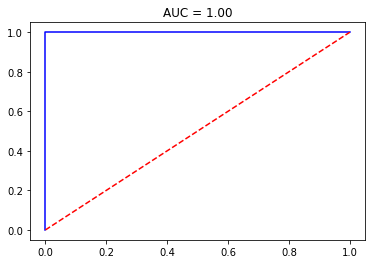

In [93]:
saca_metricas(y_test, y_pred_log)

Come se puede observar, el modelo tiene 100% de accuracy. Este fenómeno se debe a que en nuestra target 'permanencia', la inmensa mayoría de los clientes (más del 90%) continúan con la empresa y muy pocos se marchan.

Por lo tanto, el modelo no es buen predictor. 

La gráfica de precisión captura el efecto de una gran cantidad de muestras negativas en el rendimiento del algoritmo. Hay un claro problema de desbalanceo que solo detecta los casos 0 y muy mala clasificiación de 1.

### Modelo DecisionTree

matriz de confusión
[[17677     0]
 [    0  1417]]
accuracy
1.0
precision
1.0
recall
1.0
f1
1.0
AUC
1.0


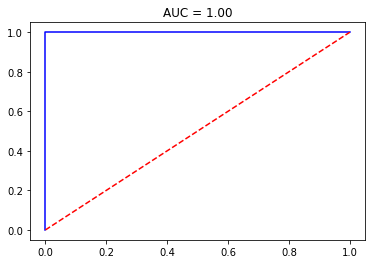

In [94]:
saca_metricas(y_test, y_pred_dt)

### Modelo RandomForest

matriz de confusión
[[17677     0]
 [    0  1417]]
accuracy
1.0
precision
1.0
recall
1.0
f1
1.0
AUC
1.0


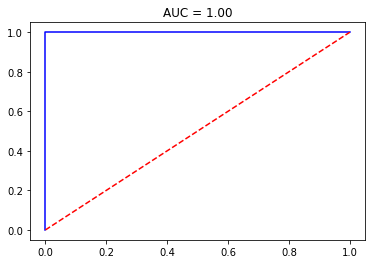

In [95]:
saca_metricas(y_test, y_pred_rf)

El modelo entrena muy bien sobre los datos del train y no del mismo modo con el test donde una vez más la gran presencia de ceros afecta sensibilidad.

## 5) Realizar una mejora del modelo utilizando técnicas vistas en clase



### ¿Que voy a hacer para mejorar el modelo?:
    
    1.  Comprobacion de Overfit
    2. 'Feature engineering'. 
    3. Hacer selección de variables

### 5.1) Comprobación del Overfitting

Por lo visto nuestros modelos vemos que no clasifican del todo bien a partir de las variables seleccionadas y eso se debe al desbalanceo de nuestras muestras

Se produce cuando el modelo funciona bastante bien con el set de entrenamiento pero tiene un desempeño pobre con el set de validación. 

Los siguientes son temas a tener en cuenta en los modelos de maching Learning:

- El proceso de diseño de un modelo de Machine Learning implica el uso de dos sets de datos: entrenamiento y validación.
Generalmente el set de entrenamiento usa aproximadamente el 80% de los datos disponibles, mientras que el de validación usa el 20% restante.
- Un modelo con underfitting es aquel en donde los errores tanto de entrenamiento como de validación son similares y relativamente altos.
- Por otra parte, en un modelo con overfitting se obtiene un error de entrenamiento relativamente bajo y uno de validación relativamente alto.
- Al desarrollar un modelo de Machine Learning se debe evitar cualquiera de los dos extremos anteriores (underfitting u overfitting).
- Lo anterior implica que el modelo ideal será aquel que permita obtener un error bajo en ambos sets (entrenamiento y validación).

fuente: https://www.codificandobits.com/blog/underfitting-y-overfitting/

Counts Class 0:  70705
Counts Class 1:  5668
Proportion of class 0:  0.9257852906131748
Proportion of class 1:  0.07421470938682519


<AxesSubplot:>

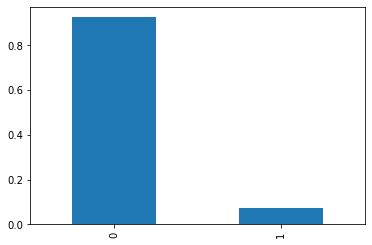

In [96]:
target_count= y_train.value_counts()
print('Counts Class 0: ',target_count[0])
print('Counts Class 1: ',target_count[1])
class_frequency = y_train.value_counts(normalize=True)
print('Proportion of class 0: ',class_frequency[0])
print('Proportion of class 1: ',class_frequency[1])
class_frequency.plot(kind='bar')

Las categorias de la variable target son de casi 93% de la categoria 1 y del 7% categoria 0, esto quiere decir que nuestro modelo si tiene la presencia de Overfit.

### 5.2) Feature Engineering

En esta sección nos vamos a concentrar en validar las variables y crear unas nuevas a partir de las iniciales para tratar de mejorar el modelo propuesto.

Primeramente, voy validar la correlación que tienen las actuales variables con la target. Evidentemente existe una baja correlación con la variable objetivo, la que presenta una mayor correlacion es num_dt con un escaso 0.3 y la edad que es del 0.29 y las demas variables estan por debajo de este valor.

In [97]:
consolidada_dic.head()

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,...,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,retiro,Mes
0,1,63,216.028109,402,23,5,0.0,0,110,79,...,12806,13751,0,0.0,0,1,50,1,0,Diciembre
1,2,84,255.830842,860,45,3,0.0,0,189,89,...,6499,10862,0,0.0,1,1,600,1,0,Diciembre
2,3,66,135.768153,6577,0,4,0.0,0,129,30,...,17013,16743,0,0.0,1,0,35,1,0,Diciembre
3,4,69,255.658527,1605,26,4,0.0,0,51,52,...,3393,6771,0,0.0,0,1,200,0,0,Diciembre
4,5,30,22.302845,8158,40,2,2.0,0,183,3,...,18436,4485,0,0.0,0,0,10,1,1,Diciembre


In [98]:
dat_dic =  consolidada_dic
dat_dic = dat_dic.drop('Mes', axis=1)
dat_dic

,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,financiacion,imp_financ,descuentos,conexion,vel_conexion,TV,retiro
0,1,63,216.028109,402,23,5,0.0,0,110,79,10897,12806,13751,0,0.000000,0,1,50,1,0
1,2,84,255.830842,860,45,3,0.0,0,189,89,18657,6499,10862,0,0.000000,1,1,600,1,0
2,3,66,135.768153,6577,0,4,0.0,0,129,30,15511,17013,16743,0,0.000000,1,0,35,1,0
3,4,69,255.658527,1605,26,4,0.0,0,51,52,12670,3393,6771,0,0.000000,0,1,200,0,0
4,5,30,22.302845,8158,40,2,2.0,0,183,3,23756,18436,4485,0,0.000000,0,0,10,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95462,99995,65,173.741667,301,29,5,0.0,0,121,98,13403,6197,6853,1,23.138779,0,0,35,0,0
95463,99996,36,215.890326,2456,16,3,0.0,0,98,13,5291,3684,1667,0,0.000000,0,0,30,1,0
95464,99997,68,285.890750,5988,3,5,0.0,0,226,20,20002,572,5679,1,14.616422,0,1,200,1,0
95465,99998,20,383.167610,2469,48,4,0.0,0,126,26,16448,833,14398,0,0.000000,0,0,20,1,0


Voy a usar la función 'proporciones_final()' para identificar patrones que los valores de las variables tienen con respecto a la objetivo

In [99]:
def proporciones_final(var,target,df):

    proporcion = pd.DataFrame()

    proporcion['%depositos'] = df[target].groupby(df[var]).mean()*100 
    proporcion['Conteo'] = df[target].groupby(df[var]).count() 
    proporcion= proporcion.round(3)   
    proporcion_filtered = proporcion[(proporcion['%depositos']>0) & (proporcion['Conteo']>10)]
        
    if len(proporcion_filtered)<100 and len(proporcion_filtered)>1:
        fig = plt.figure()
        ax = proporcion_filtered['Conteo'].plot(kind='bar',grid=True)
                
        ax2 = ax.twinx()
        ax2.plot(proporcion_filtered['%depositos'].values, linestyle='-', linewidth=2.0,color='r')
        plt.tight_layout()        
    
    else:        
        proporcion_filtered.reset_index(inplace=True)
        sns.lmplot(x = var,y ='%depositos',data=proporcion_filtered, fit_reg=True,ci=None) 

Le paso a la función las variables que tiene menos de 12 valores únicos.


In [100]:
dat_dic.columns

Index(['id', 'edad', 'facturacion', 'antiguedad', 'provincia', 'num_lineas',
       'num_dt', 'incidencia', 'num_llamad_ent', 'num_llamad_sal', 'mb_datos',
       'seg_llamad_ent', 'seg_llamad_sal', 'financiacion', 'imp_financ',
       'descuentos', 'conexion', 'vel_conexion', 'TV', 'retiro'],
      dtype='object')

In [101]:
def visualizar_variables_numericas_binarizadas(dataset, q, target='retiro'):
    sin_la_target=dataset.loc[:, dataset.columns != target]
    new_vars={}
    values=[i for i in range(q)]
    for i in range(len(sin_la_target.columns)):
        new_vars[str(sin_la_target.columns[i])]=pd.qcut(dataset[str(sin_la_target.columns[i])], 
                                                         q=q, labels=values)
    vars_to_plot=pd.DataFrame(new_vars).fillna(0) 
    target=pd.DataFrame(dataset[target])
    new_continuous_vars=pd.concat([target, vars_to_plot.reindex(target.index)], axis=1)  
    for i in vars_to_plot.columns:
        proporciones_final(i, 'retiro', new_continuous_vars) 

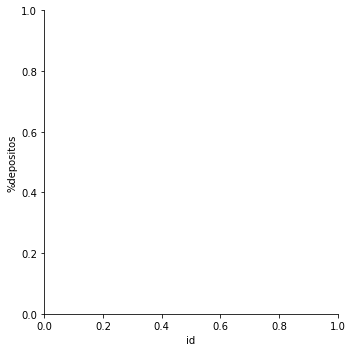

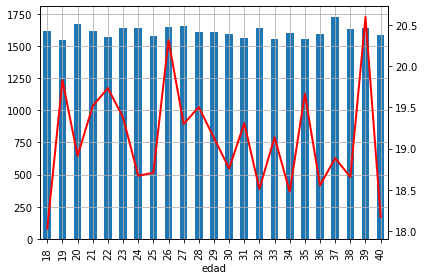

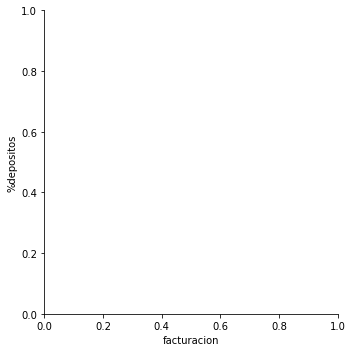

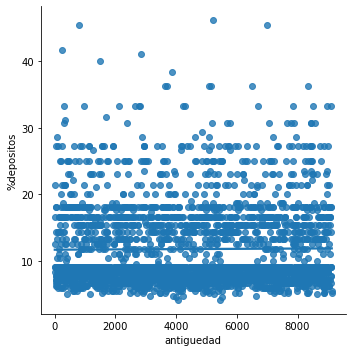

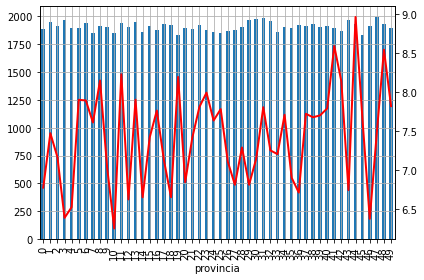

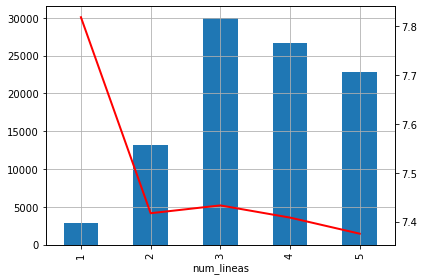

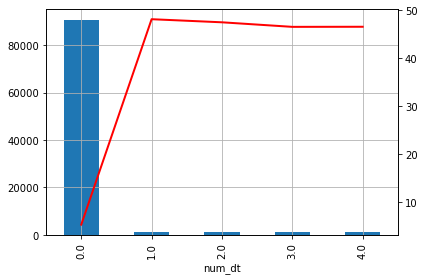

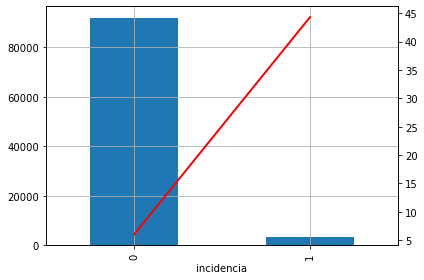

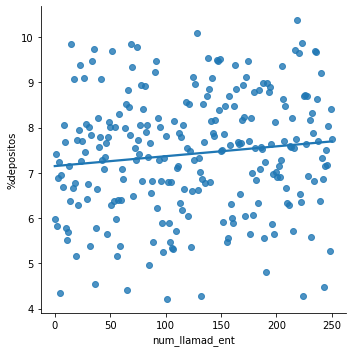

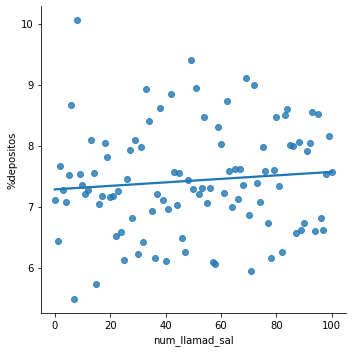

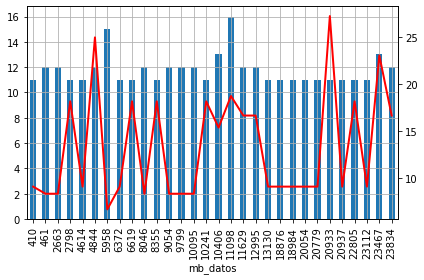

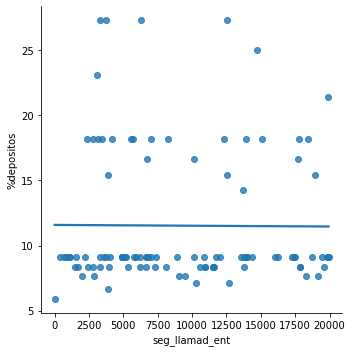

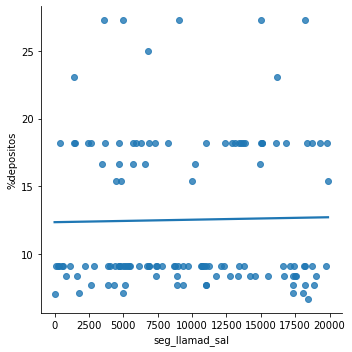

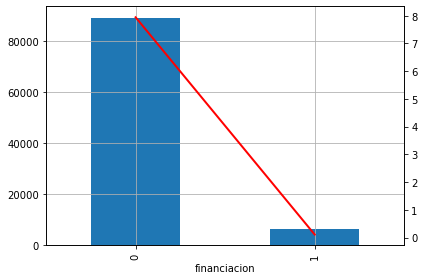

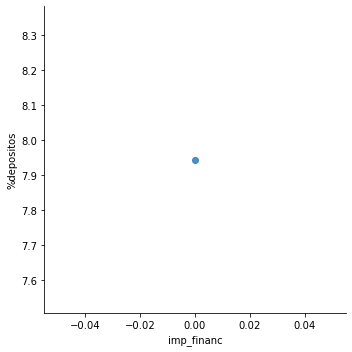

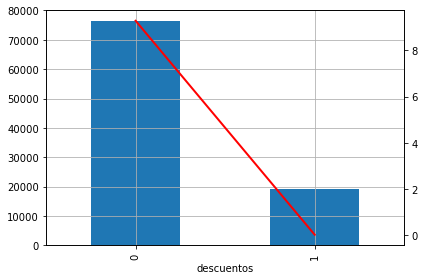

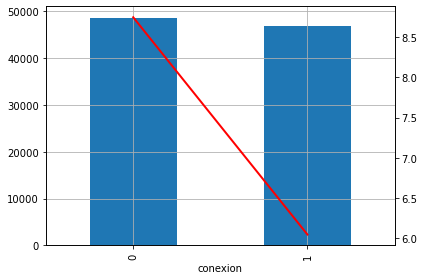

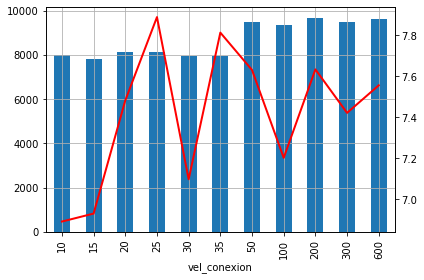

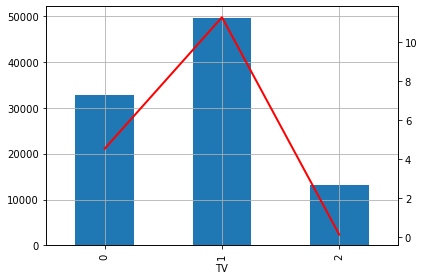

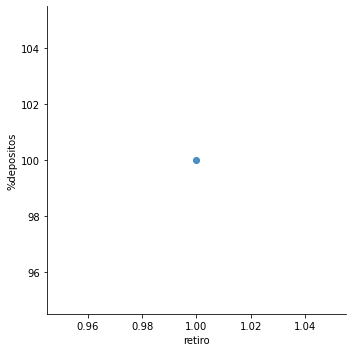

In [102]:
for i in dat_dic.columns:
    proporciones_final (i, 'retiro', dat_dic)

##### **Observaciones:**

Se observa un comportamiento bastante aleatorio en las variables numéricas. 

Sin embargo, la variable edad muestra un comportamiento diferenciado por edad, voy a reclasificar esta variable en 3 tramos diferentes de acuerdo con el siguiente criterio:
Divido las edades por 'joven' (0-40), 'adulto' (40-67) y 'jubilado' (67-100)

Para evitar multicolineardiad, únicamente selecciono 'adulto' y 'jubilado'

* La viarable antiguedad, la voy a llevar a años al dividirla por 365.

* La variable num_dt, 1: si el valor es mayor que 0 y 1 para valores diferentes

* La variables: facturacion, la voy a tramificar usando la funcion vista en clase para tramificar 


In [103]:
edad_por_rangos=pd.cut(consolidada_dic.edad, bins=[0,40,67,100], labels=['joven','adulto',
                                                              'jubilado']) 
dummies_edad=pd.DataFrame(pd.get_dummies(edad_por_rangos).astype('int32'))
dummies_edad=dummies_edad.loc[:,['adulto','jubilado']]
consolidada_dic=pd.concat([consolidada_dic, dummies_edad.reindex(consolidada_dic.index)], axis=1)

# Lo hacemos para Enero tambien

edad_por_rangos=pd.cut(consolidada_ene.edad, bins=[0,40,67,100], labels=['joven','adulto',
                                                              'jubilado']) 
dummies_edad=pd.DataFrame(pd.get_dummies(edad_por_rangos).astype('int32'))
dummies_edad=dummies_edad.loc[:,['adulto','jubilado']]
consolidada_ene=pd.concat([consolidada_ene, dummies_edad.reindex(consolidada_ene.index)], axis=1)


In [104]:
def tramos(varib,varib_destino,tamanio,maximo,df):
    df[varib_destino]=np.where(df[varib]==0,-1,(df[varib]//tamanio)*tamanio)
    df[varib_destino]=np.where(df[varib_destino]>=maximo,maximo,df[varib_destino])

In [105]:
consolidada_dic['antiguedad'].describe()

count    95467.000000
mean      4572.466968
std       2630.422152
min         -1.000000
25%       2308.000000
50%       4586.000000
75%       6850.000000
max       9129.000000
Name: antiguedad, dtype: float64

La antiguedad llevarla a años, dividiendo por 365

In [106]:
consolidada_dic['antiguedad'] = consolidada_dic['antiguedad'].apply(lambda x: 0 if x < 0 else x)
consolidada_dic['antiguedad'] = round(consolidada_dic['antiguedad']/365)

# Lo mismo para Enero
consolidada_ene['antiguedad'] = consolidada_ene['antiguedad'].apply(lambda x: 0 if x < 0 else x)
consolidada_ene['antiguedad'] = round(consolidada_ene['antiguedad']/365)

In [107]:
consolidada_dic['num_dt'].describe()

count    95467.000000
mean         0.124242
std          0.598773
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: num_dt, dtype: float64

In [108]:
consolidada_dic['num_dt'].value_counts()

0.0    90738
4.0     1206
1.0     1179
2.0     1174
3.0     1170
Name: num_dt, dtype: int64

Esta variable se puede reclasificar en dos valores para los que son 0 y los demas a mayor que 0

In [109]:
consolidada_dic['num_dt'] = consolidada_dic['num_dt'].apply(lambda x: 1 if x>1 else x)
consolidada_ene['num_dt'] = consolidada_ene['num_dt'].apply(lambda x: 1 if x>1 else x)

In [110]:
consolidada_dic['num_dt'].value_counts()

0.0    90738
1.0     4729
Name: num_dt, dtype: int64

In [111]:
consolidada_dic['facturacion'].describe()

count    95467.000000
mean       207.392912
std        111.343491
min         15.000439
25%        111.383822
50%        206.808431
75%        304.436599
max        399.998433
Name: facturacion, dtype: float64

#### Se tramifica la variable facturacion usando la funcion tramos

In [112]:
tramos('facturacion','facturacion_new',60,400,consolidada_dic) 
tramos('facturacion','facturacion_new',60,400,consolidada_ene) 

In [113]:
consolidada_dic['facturacion_new'].value_counts()

120.0    15078
300.0    14942
60.0     14909
180.0    14752
240.0    14583
0.0      11156
360.0    10047
Name: facturacion_new, dtype: int64

In [114]:
consolidada_dic['num_lineas'].describe()

count    95467.000000
mean         3.559261
std          1.095542
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max         39.000000
Name: num_lineas, dtype: float64

In [115]:
consolidada_dic['num_lineas'].value_counts()

3     30013
4     26619
5     22794
2     13186
1      2852
18        1
39        1
26        1
Name: num_lineas, dtype: int64

In [116]:
consolidada_dic['num_lineas'] = consolidada_dic['num_lineas'].apply(lambda x: 5 if x>5 else x) # Asignamos 5 a los valores mayores a 5
consolidada_ene['num_lineas'] = consolidada_ene['num_lineas'].apply(lambda x: 5 if x>5 else x) # Asignamos 5 a los valores mayores a 5


In [117]:
consolidada_dic['num_lineas'].value_counts()

3    30013
4    26619
5    22797
2    13186
1     2852
Name: num_lineas, dtype: int64

In [118]:
consolidada_dic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95467 entries, 0 to 95466
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               95467 non-null  int64  
 1   edad             95467 non-null  int64  
 2   facturacion      95467 non-null  float64
 3   antiguedad       95467 non-null  float64
 4   provincia        95467 non-null  int32  
 5   num_lineas       95467 non-null  int64  
 6   num_dt           95467 non-null  float64
 7   incidencia       95467 non-null  int32  
 8   num_llamad_ent   95467 non-null  int64  
 9   num_llamad_sal   95467 non-null  int64  
 10  mb_datos         95467 non-null  int64  
 11  seg_llamad_ent   95467 non-null  int64  
 12  seg_llamad_sal   95467 non-null  int64  
 13  financiacion     95467 non-null  int32  
 14  imp_financ       95467 non-null  float64
 15  descuentos       95467 non-null  int32  
 16  conexion         95467 non-null  int32  
 17  vel_conexion

#### Evalúo la correlación de todas las variables y veo si las nuevas variables creadas están más correlacionadas que las antiguas

In [119]:
corr = abs(consolidada_dic.corr()) #since we have included a new var
corr[['retiro']].sort_values(by = 'retiro',ascending = False).style.background_gradient() 


,retiro
retiro,1.000000
num_dt,0.346618
edad,0.296835
incidencia,0.277408
adulto,0.215899
jubilado,0.160910
descuentos,0.141447
financiacion,0.074597
imp_financ,0.067626
conexion,0.051478


La parte de feature engineering queda acabada.Ahora comienzo la selección de variables.
Pero antes, reviso que no hay valores NAs

In [120]:
consolidada_dic.isnull().sum() 

id                 0
edad               0
facturacion        0
antiguedad         0
provincia          0
num_lineas         0
num_dt             0
incidencia         0
num_llamad_ent     0
num_llamad_sal     0
mb_datos           0
seg_llamad_ent     0
seg_llamad_sal     0
financiacion       0
imp_financ         0
descuentos         0
conexion           0
vel_conexion       0
TV                 0
retiro             0
Mes                0
adulto             0
jubilado           0
facturacion_new    0
dtype: int64

### 5.3) Seleccion de Variables

**Realizo seleccion de variables para detectar Multicolinearidad.** 

Uno de los principales beneficios de la selección de variables esta plasmado por la famosa frase "Menos es más" del arquitecto Ludwig Mies van der Rohe, precursor del minimalismo. Menos atributos son deseables ya que reduce la complejidad del modelo, y un modelo más simple es más fácil de entender y explicar.


para ello, ejecuto elmetodo VIF, examino que variables fueron eliminadas por VIF y verifico.

El valor del VIF es siempre positivo y crece en un conjunto de datos a medida que aumenta la multicolinealidad entre las características. En caso de que en un conjunto de características exista multicolinealidad perfecta, es decir, que una característica se pueda explicar perfectamente mediante la combinación lineal del resto, el valor será infinito, ya que, en tal caso, el Ri^2 de la regresión será igual la unidad.

Voy a usar dos algoritmos vistos en clase para determinar las variables que vamos a sacar del estudio.


el primero tiene que ver con el calculo del VarianceThreshold:

Este método de selección de varianza es un método de línea de base simple para la selección de características, que elimina todas las características que no cumplen con los requisitos de un umbral dado. El umbral es 0.6 de forma predeterminada. Este método elimina características con una varianza de 0.6 de forma predeterminada, es decir, características con el mismo valor en todas las muestras.

El segundo algoritmo es el del VIF

**En general se suele emplear el criterio expuesto en la siguiente tabla**:

**Valor de VIF	Grado de Muticolinealidad**

Hasta 5	     Débil/Moderado

De 5 a 10	 Elevado

Mayor a 10	 Muy elevado


In [121]:
dat_dic = consolidada_dic
y = dat_dic['retiro']
X = dat_dic.drop('retiro', axis=1)
X = dat_dic.drop('Mes', axis=1)

In [122]:
var_th = VarianceThreshold(threshold = 0.60)
x_var = var_th.fit_transform(X)

In [123]:
X.shape[1] ## variables principales


23

In [124]:
X.columns

Index(['id', 'edad', 'facturacion', 'antiguedad', 'provincia', 'num_lineas',
       'num_dt', 'incidencia', 'num_llamad_ent', 'num_llamad_sal', 'mb_datos',
       'seg_llamad_ent', 'seg_llamad_sal', 'financiacion', 'imp_financ',
       'descuentos', 'conexion', 'vel_conexion', 'TV', 'retiro', 'adulto',
       'jubilado', 'facturacion_new'],
      dtype='object')

In [125]:
x_var.shape[1] ## vairables finales

14

In [126]:
np.asarray(list(X))[var_th.get_support()]

array(['id', 'edad', 'facturacion', 'antiguedad', 'provincia',
       'num_lineas', 'num_llamad_ent', 'num_llamad_sal', 'mb_datos',
       'seg_llamad_ent', 'seg_llamad_sal', 'imp_financ', 'vel_conexion',
       'facturacion_new'], dtype='<U15')

Segun este metodo, se eliminan 7 variables y solo quedarian 14 para el modelo.

In [128]:

from sklearn.linear_model import LinearRegression

# Borrado de la variable objetivo
datos_vif = consolidada_dic.copy(deep = True)
features = list(datos_vif.columns)
features.remove('retiro')
features.remove('Mes')
datos_vif = datos_vif[features]

for i in range(len(features)): # HAlla el VIF de cada variable, de todas las que se pasan de 5, se elimina. La mayor de todas y se vuelve a calcular todo
    var = features[i]
    fet = features[:]
    fet.remove(var)
    
    x = datos_vif[fet]
    y = consolidada_dic[var]
    
    model = LinearRegression()
    model.fit(x, y)
    
    vif = 1 / (1 - model.score(x, y))
    
    print ('El valor del VIF para la variable', var, 'es:', vif)

El valor del VIF para la variable id es: 1.0013726360711177
El valor del VIF para la variable edad es: 8.572141399584778
El valor del VIF para la variable facturacion es: 45.33848063047421
El valor del VIF para la variable antiguedad es: 1.0001561150542098
El valor del VIF para la variable provincia es: 1.0003103100155535
El valor del VIF para la variable num_lineas es: 1.3088005974009942
El valor del VIF para la variable num_dt es: 1.0198877836709883
El valor del VIF para la variable incidencia es: 1.013972945430787
El valor del VIF para la variable num_llamad_ent es: 1.000532733048789
El valor del VIF para la variable num_llamad_sal es: 1.0009293947552946
El valor del VIF para la variable mb_datos es: 1.0001360555396333
El valor del VIF para la variable seg_llamad_ent es: 1.000379656039085
El valor del VIF para la variable seg_llamad_sal es: 1.0009598340519172
El valor del VIF para la variable financiacion es: 5.47298987881581
El valor del VIF para la variable imp_financ es: 5.470938

Segun este metodo, solo se eliminarian las variables facturacion y imp_finac. No bosatante se hicieron pruebas con los modelo y fue mas efectivo el primer metodo, por lo que se eliminaran las vaariables: *'facturacion'*,*'conexion'*,*'TV'*,*'imp_financ'*,*'incidencia'*,*'descuentos'


## 6) Correr los Modelos

#### Mejor modelo


Volvemos a tomar las variables X y Y

In [132]:
X =  consolidada_dic
y = consolidada_dic['retiro']


,id,edad,facturacion,antiguedad,provincia,num_lineas,num_dt,incidencia,num_llamad_ent,num_llamad_sal,...,imp_financ,descuentos,conexion,vel_conexion,TV,retiro,Mes,adulto,jubilado,facturacion_new
0,1,63,216.028109,1.0,23,5,0.0,0,110,79,...,0.000000,0,1,50,1,0,Diciembre,1,0,180.0
1,2,84,255.830842,2.0,45,3,0.0,0,189,89,...,0.000000,1,1,600,1,0,Diciembre,0,1,240.0
2,3,66,135.768153,18.0,0,4,0.0,0,129,30,...,0.000000,1,0,35,1,0,Diciembre,1,0,120.0
3,4,69,255.658527,4.0,26,4,0.0,0,51,52,...,0.000000,0,1,200,0,0,Diciembre,0,1,240.0
4,5,30,22.302845,22.0,40,2,1.0,0,183,3,...,0.000000,0,0,10,1,1,Diciembre,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95462,99995,65,173.741667,1.0,29,5,0.0,0,121,98,...,23.138779,0,0,35,0,0,Diciembre,1,0,120.0
95463,99996,36,215.890326,7.0,16,3,0.0,0,98,13,...,0.000000,0,0,30,1,0,Diciembre,0,0,180.0
95464,99997,68,285.890750,16.0,3,5,0.0,0,226,20,...,14.616422,0,1,200,1,0,Diciembre,0,1,240.0
95465,99998,20,383.167610,7.0,48,4,0.0,0,126,26,...,0.000000,0,0,20,1,0,Diciembre,0,0,360.0


In [133]:
datos1 = consolidada_dic.copy(deep = True)
datos1 = consolidada_dic.drop(['retiro','facturacion','conexion','TV','Mes','imp_financ','incidencia','descuentos'], axis=1)
X =  datos1

#### Volvemos a generar las muestras Train y Test

In [134]:

X_train, X_test, y_train, y_test = train_test_split(X ,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

Segun este criterio se eliminaron las correlaciones, vamos a volver a generar los modelos. Para ello vamos a realizar un  un grid Seach, para encontratr el mejor modelo el mejor Random Forest. 

In [135]:
grid_param = {
    'n_estimators': [10, 20, 30, 80, 90],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_depth': [4,5,6,7,8,9,10,12,14,16]
}

### Modelo de regresion

In [136]:
classifier = LogisticRegression(solver ="liblinear" ,max_iter=1000).fit(X_train, y_train)
y_pred     = classifier.predict(X_test) 

### Random Forest y Grid Seach

In [137]:
classifier2 = RandomForestClassifier(max_depth = 8).fit(X_train, y_train)
y_pred2    = classifier2.predict(X_test)

In [139]:
from sklearn.model_selection import GridSearchCV
model_grid = GridSearchCV(estimator=classifier2,
                     param_grid=grid_param,
                     scoring='recall',
                     cv=5,
                     n_jobs=-1)

In [140]:
model_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=8), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 12, 14, 16],
                         'n_estimators': [10, 20, 30, 80, 90]},
             scoring='recall')

In [141]:
print(model_grid.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 8, 'n_estimators': 20}


In [142]:
print(model_grid.best_score_)

0.3117519780950201


In [155]:
classifier2 = RandomForestClassifier(max_depth= 8, bootstrap= False, n_estimators= 20, criterion= 'gini').fit(X_train, y_train)
y_pred2    = classifier2.predict(X_test)

matriz de confusión
[[17538   139]
 [  974   443]]
accuracy
0.9417094375196396
precision
0.761168384879725
recall
0.31263232180663375
f1
0.4432216108054027
AUC
0.6523844982908827


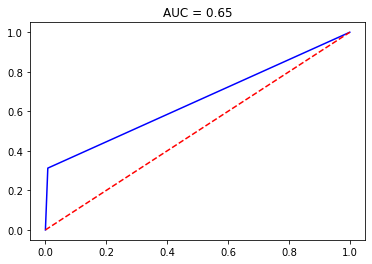

In [158]:
saca_metricas(y_test, y_pred2)

In [184]:
classifier2.feature_importances_

array([0.02720791, 0.37405807, 0.0020397 , 0.0014343 , 0.00091617,
       0.41422162, 0.0036138 , 0.00254437, 0.00372921, 0.00392985,
       0.00375537, 0.04468419, 0.00137588, 0.07013764, 0.04544432,
       0.0009076 ])

In [185]:
classifier2.feature_names_in_

array(['id', 'edad', 'antiguedad', 'provincia', 'num_lineas', 'num_dt',
       'num_llamad_ent', 'num_llamad_sal', 'mb_datos', 'seg_llamad_ent',
       'seg_llamad_sal', 'financiacion', 'vel_conexion', 'adulto',
       'jubilado', 'facturacion_new'], dtype=object)

In [159]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     17677
           1       0.76      0.31      0.44      1417

    accuracy                           0.94     19094
   macro avg       0.85      0.65      0.71     19094
weighted avg       0.93      0.94      0.93     19094



#### BALANCEO DATOS 1

Pruebo a balancear el modelo de regresión logística, para ver si mejora:


In [147]:
grid_param = {
    'max_iter': [100, 500, 1000, 2000],
    'penalty': ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
}

In [148]:
model_grid = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='recall',
                     cv=5,
                     n_jobs=-1)

In [149]:
model_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 500, 1000, 2000],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [150]:
print(model_grid.best_params_)

{'C': 0.012742749857031334, 'max_iter': 100, 'penalty': 'l1'}


In [151]:
print(model_grid.best_score_)

0.3145752485558311


In [162]:
classifier = LogisticRegression(solver ="liblinear" ,max_iter=100, class_weight="balanced").fit(X_train, y_train)
y_pred     = classifier.predict(X_test) 

In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81     17677
           1       0.20      1.00      0.34      1417

    accuracy                           0.71     19094
   macro avg       0.60      0.84      0.57     19094
weighted avg       0.94      0.71      0.78     19094



matriz de confusión
[[17538   139]
 [  974   443]]
accuracy
0.9417094375196396
precision
0.761168384879725
recall
0.31263232180663375
f1
0.4432216108054027
AUC
0.6523844982908827


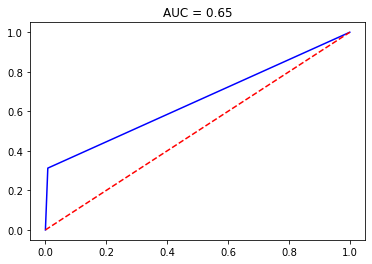

In [164]:
saca_metricas(y_test, y_pred2)

## 7) Conclusión

Encuentro que el mejor modelo es el que resulta del modelo logistico y del arbol de decision *Random Forest*. Lo anterior, porque me clasifica mejor que los modelos anteriores y ademas, presenta un mejor resultado, tiene un **(accuracy ~ 0.94)**.


## 8) Predecir los clientes de la cosecha de enero que más probabilidad tienen de cambiarse de operadora

Vamos a ver como funciona nuestro mejor modelo para una nueva cosecha, en este caso enero. Para ello es necesario aplicar las mismas transformaciones hechas anteriormente y lo obtengo del **Modelo ganador**.

### 8.1) Prediccion Enero

Finalmente tenemos un modelo con hasta una probabilidad entorno al 65% de los casos de predecir clientes más probables a marcharse de la compañía

In [165]:
datos1 = consolidada_ene.copy(deep = True)
datos1 = consolidada_ene.drop(['retiro','facturacion','conexion','TV','Mes','imp_financ','incidencia','descuentos'], axis=1)
X_ene =  datos1

In [172]:
prediccion_enero = classifier.predict_proba(X_ene)[:,1]

In [173]:
prediccion_enero

array([5.62883452e-04, 9.90325387e-04, 5.38698685e-04, ...,
       6.82548965e-01, 4.94181757e-04, 6.72285852e-01])

In [174]:
prediccion_enero = (pd.DataFrame(prediccion_enero,columns=['probabilidad'],index=X_ene.index))
prediccion_enero.sort_values(by=['probabilidad'],ascending=False,axis=0,inplace=True)

In [175]:
prediccion_enero.head()

,probabilidad
5754,0.978389
1961,0.978108
4811,0.977970
3850,0.977915
2360,0.977878


In [176]:
X_ene.reset_index(inplace=True)

In [177]:
X_ene.shape

(92711, 17)

In [178]:
X_ene.head()

,index,id,edad,antiguedad,provincia,num_lineas,num_dt,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,financiacion,vel_conexion,adulto,jubilado,facturacion_new
0,0,1,63,1.0,23,5,0.0,95,19,6525,7634,18520,0,50,1,0,180.0
1,1,2,84,2.0,45,3,0.0,44,36,14471,14541,8016,0,600,0,1,240.0
2,2,3,66,18.0,0,4,0.0,94,27,1428,5248,7106,0,35,1,0,120.0
3,3,4,69,4.0,26,4,0.0,186,20,20083,7372,5052,0,200,0,1,240.0
4,4,6,51,22.0,18,4,0.0,37,32,19078,5009,8686,0,200,1,0,60.0


In [179]:
prediccion_enero.reset_index(inplace=True)

In [180]:
prediccion_enero.head()

,index,probabilidad
0,5754,0.978389
1,1961,0.978108
2,4811,0.977970
3,3850,0.977915
4,2360,0.977878


In [181]:
results = pd.merge(X_ene, prediccion_enero, on= ['index'])

In [182]:
results.sort_values(by='probabilidad', ascending= False)

,index,id,edad,antiguedad,provincia,num_lineas,num_dt,num_llamad_ent,num_llamad_sal,mb_datos,seg_llamad_ent,seg_llamad_sal,financiacion,vel_conexion,adulto,jubilado,facturacion_new,probabilidad
5754,5754,6248,29,10.0,44,5,1.0,227,44,24849,15432,5322,0,600,0,0,180.0,0.978389
1961,1961,2122,37,0.0,35,2,1.0,237,85,5185,12136,4339,0,50,0,0,120.0,0.978108
4811,4811,5230,19,15.0,29,5,1.0,242,91,9942,3143,2536,0,600,0,0,120.0,0.977970
3850,3850,4187,18,7.0,32,2,1.0,228,97,16470,17569,2270,0,30,0,0,60.0,0.977915
2360,2360,2547,37,4.0,47,2,1.0,165,58,24951,1568,11600,0,200,0,0,120.0,0.977878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90300,90300,97394,47,20.0,10,5,0.0,16,61,100,1751,6045,1,20,1,0,360.0,0.000005
88887,88887,95872,60,21.0,22,4,0.0,30,50,20132,15146,11769,1,35,1,0,60.0,0.000005
91801,91801,99014,57,13.0,30,5,0.0,1,9,21159,9537,14437,1,20,1,0,180.0,0.000005
84840,84840,91483,61,15.0,0,5,0.0,46,35,787,5328,13166,1,15,1,0,240.0,0.000005


In [183]:
results.to_csv('resultados.csv', index=False)

# IMPORTANCIA DE LAS VARIABLES Y CONCLUSION FINAL:


Las variable mas determinantes en la fuga de clientes para la compañía telefónica y que tienen una mayor correlacion son:

- **num_llamad_ent**
- **edad**
- **vel_conexion**
- **adulto**
- **financiacion*

elnuemro de llamdas entrantes, la edad era determinante viendo su respuesta frente a la variable objetivo como hicimos anteriormente en apartados anteriores donde las personas jovenes tendian a cancelar el servicio, frente a los adultos que son mas **"fieles"**, la velocidad de conexion y si tiene o no financiacion.

Conclusion si yo fuera a presentar este estudio al Gerente de la Compañía propondría una campaña especial con mis clientes más jovenes, los que tienen poca velocidad de conexion y si no tiene equipos en financiados, generar politicas de fidelizacion. 